<a href="https://colab.research.google.com/github/shikharmay7/minor-project/blob/master/Copy_of_MinorBiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
base_path = "/content/drive/My Drive/minor_sem6"

In [ ]:
dir_list = os.listdir(base_path)
len(dir_list)

4

In [ ]:
def getListOfFiles(dirName):
# create a list of file and sub directories 
# names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
# Iterate over all the entries
    for entry in listOfFile:
# Create full path
        fullPath = os.path.join(dirName, entry)
# If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles  

In [ ]:
listOfFiles = getListOfFiles(base_path)

In [ ]:
listOfFiles.sort()

In [ ]:
listOfFiles

['/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00001.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00002.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00003.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00004.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00005.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00006.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00007.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00008.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00009.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00010.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00011.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00012.jpeg',
 '/content/drive/My Drive/minor_sem6/aman/amanLeftRight_01/scene00013.jpeg',

In [ ]:
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16, ResNet50
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, Input, BatchNormalization, GRU
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D, Conv1D, Activation, TimeDistributed
from keras import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 100
    for i in range(0,4):
        for j in range(0,4):
            image = load_img(X[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
    # show the plot
    plt.show()

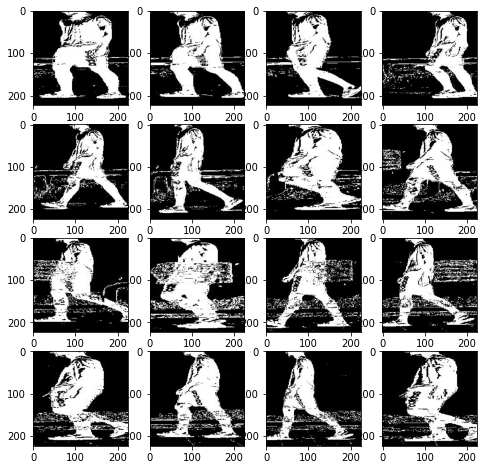

In [ ]:
show_imgs(listOfFiles)

(138, 338)

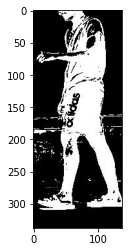

In [ ]:
img = load_img(listOfFiles[0])
plt.imshow(img)
img.size

In [ ]:
l=[1,2,3]
mat= np.zeros((5,5,3))
for i in range(5):
  for j in range(5):
    mat[i][j]=l

mat.shape
mat


array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

In [ ]:
Tx = 25 #the number of time steps input to the model
n_freq = 25088  #number of features input to the model
m = 20  #the number of training examples
X = np.zeros((m, Tx, n_freq))

In [ ]:
model1 = VGG16(weights='imagenet', include_top = False)
model1.summary()

58892288/58889256 [==============================] - 29s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_____________________________________________________________

In [ ]:
def create_features(dataset, pre_model):
 
    x_scratch = []
 
    # loop over the images
    for imagePath in dataset:
 
        # load the input image and image is resized to 224x224 pixels 
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [ ]:
img = load_img(listOfFiles[0], target_size=(224,224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = imagenet_utils.preprocess_input(img)
features = model1.predict(img)
features_flatten = features.reshape((1,7*7*512))
features_flatten.shape

(1, 25088)

In [ ]:
features_flatten

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
for i in range(20):
  for j in range(25):
    k = i*25 + j
    img = load_img(listOfFiles[k], target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = imagenet_utils.preprocess_input(img)
    features = model1.predict(img)
    features_flatten = features.reshape((1,7*7*512))
    X[i][j] = features_flatten

In [ ]:
X.shape
# np.save('/content/drive/My Drive/minorX.npy',X)

(20, 25, 25088)

In [ ]:
label_dict = {0 : 'Aman', 1: 'Ankit', 2: 'Avinash', 3: 'Shikhar'}

In [ ]:
Y=[]
for i in range(4):
  for j in range(5):
    Y.append(i)

In [ ]:
nb_class = 4
y_hot = np_utils.to_categorical(Y, nb_class)
y_hot[:20]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
# np.save('/content/drive/My Drive/minorY.npy', y_hot)

In [ ]:
pip install keras-segmentation

In [ ]:
pip install git+https://github.com/divamgupta/image-segmentation-keras.git

  Cloning https://github.com/divamgupta/image-segmentation-keras.git to /tmp/pip-req-build-z9felacr
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras.git /tmp/pip-req-build-z9felacr
     |████████████████████████████████| 3.3MB 2.9MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=30454 sha256=f61eca00a7cbecf8b5a26233d9167eb509b233c5e7693b050260c85c2d35f45d
  Stored in directory: /tmp/pip-ephem-wheel-cache-w0htpxjg/wheels/0a/4e/8b/d3f9088958a351a72f48ede4558836b78a03c0c124f81f41ed
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.core.protobuf import rewriter_config_pb2
# from tensorflow.keras.backend import set_session
tf.keras.backend.clear_session()  # For easy reset of notebook state.

config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
def model(input_shape):
    """
    Function creating the model's graph in Keras.
    
    Argument:
    input_shape -- shape of the model's input data (using Keras conventions)

    Returns:
    model -- Keras model instance
    """
    
    X_input = Input(shape = input_shape)
    
    # Step 1: CONV layer (≈4 lines)
    X = Conv1D(filters=196,kernel_size=15,strides=4)(X_input)                                 # CONV1D
    X = BatchNormalization()(X)                                  # Batch normalization
    X = Activation("relu")(X)                                 # ReLu activation
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)

    # Step 2: First GRU Layer (≈4 lines)
    X = GRU(units=128, return_sequences =True)(X)    # GRU (used 128 units and return the sequences)
    X = Dropout(rate=0.8)(X)                                   # dropout (used 0.8)
    X = BatchNormalization()(X)                                 # Batch normalization
    
    # Step 3: Second GRU Layer (≈4 lines)
    X = GRU(units=128)(X)                                 # GRU (use 128 units and return the sequences)
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)
    X = BatchNormalization()(X)                                  # Batch normalization
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)
    # X=Flatten()(X)


    # Step 4: Time-distributed dense layer 
    X = Dense(4, activation = "softmax")(X) # time distributed  (sigmoid)
    
    ### END CODE HERE ###

    model = Model(inputs = X_input, outputs = X)
    
    return model

In [ ]:
# Tx = 25 #the number of time steps input to the model
# n_freq = 25088  #number of features input to the model
# m = 20  #the number of training examples
# X = np.zeros((m, Tx, n_freq))

In [ ]:
model = model(input_shape = (Tx, n_freq))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 25, 25088)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 196)            73758916  
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 196)            784       
_________________________________________________________________
activation_1 (Activation)    (None, 3, 196)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 196)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 3, 128)            124800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 128)            0   

In [ ]:
opt = Adam(lr=0.0001, beta_1 = 0.9, beta_2 = 0.999, decay=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
model.fit(X,y_hot, batch_size=4, epochs=5)

Epoch 1/5
20/20 [==============================] - 9s 426ms/step - loss: 2.6800 - accuracy: 0.3000
Epoch 2/5
20/20 [==============================] - 7s 351ms/step - loss: 2.0223 - accuracy: 0.3500
Epoch 3/5
20/20 [==============================] - 7s 353ms/step - loss: 2.2883 - accuracy: 0.3000
Epoch 4/5
20/20 [==============================] - 7s 350ms/step - loss: 2.1833 - accuracy: 0.3500
Epoch 5/5
20/20 [==============================] - 8s 379ms/step - loss: 2.8700 - accuracy: 0.2500
